In [2]:
# Discriminator: If realthing comes, discriminator have to know what is real thing from fake things.
# Generator: Generator must generate the fake thing what is to be exactly same from real things.

In [4]:
# G(z): Fake Things(fake images.), z is features.
# D(x): Success rate of Discrimanation. , if true: D(x) = 1, log(D(x)) = 0, fake: D(x) = 0, log(D(x)) = -Infinite
# Maximize D(First), Train about G(Second)
#

In [12]:
# DCGAN: Improved Version Of GAN
# Use Convolution, and removed unnecessary information
# Added Batch Normalization, and except for input of generator and input of discriminator

In [14]:
# cGAN: Generate distinct(particular) image.
# give Label(c)

In [ ]:
# Pix2Pix: use cGan for Image to Image Translation

# GAN

In [5]:
import torch
import torch.nn as nn
import torch.nn.init
import torch.optim as optim


import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare MNIST Data

In [8]:
mnist_train = dsets.MNIST(root='data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='data/', train=False, transform=transforms.ToTensor(), download=True)

In [9]:
batch_size = 100
train_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True)

In [10]:
def imshow(img, title):
    npimg = img.numpy()
    fig = plt.figure(figsize = (5, 15))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.show()

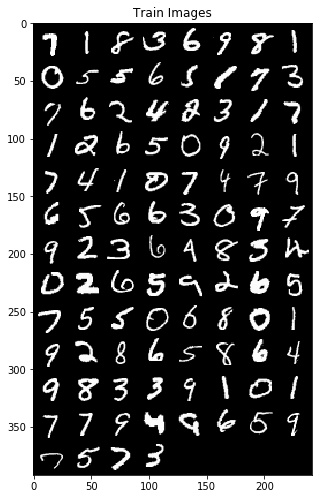

In [11]:
images, labels = iter(train_loader).next()
imshow(torchvision.utils.make_grid(images, normalize=True), "Train Images")

# Define Model

In [17]:
# Input: Image
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.discriminator = nn.Sequential(
            nn.Linear(28 * 28, 500),
            nn.LeakyReLU(),
            nn.Dropout(0.5), 
            nn.Linear(500, 250),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.5), 
            nn.Linear(250, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        out = self.discriminator(x)
        return out

In [18]:
# Input: Vector
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.generator = nn.Sequential(
            nn.Linear(100, 250),
            nn.LeakyReLU(0.2),
            nn.Linear(250, 500),
            nn.LeakyReLU(0.2),
            nn.Linear(500, 28 * 28),
            nn.Tanh()
        )
    
    def forward(self, z):
        out = self.generator(z)
        out = out.view(-1, 1, 28, 28)
        return out

In [20]:
D = Discriminator()
G = Generator()

In [ ]:
D(torch.rand(100, 1, 28, 28)).shape

In [ ]:
G(torch.rand(100, 100)).shape

# Train Model

In [21]:
def gan_loss(x, target_is_real):
    loss = nn.BCELoss()
    
    if target_is_real:
        target_tensor = torch.ones(batch_size, 1)
    else:
        target_tensor = torch.zeros(batch_size, 1)
        
    return loss(x, target_tensor)

In [22]:
G_optimizer = optim.Adam(G.parameters(), lr=0.0001)
D_optimizer = optim.Adam(D.parameters(), lr=0.0001)

In [23]:
num_epochs = 50

In [26]:
for epoch in range(num_epochs):
    total_batch = len(mnist_train) // batch_size
    
    for i, (images, labels) in enumerate(train_loader):
        prob_real = D(images)
        D_loss_real = gan_loss(prob_real, True)
        
        z = torch.randn((batch_size, 100))
        fake_images = G(z)
        
        prob_fake = D(fake_images)
        D_loss_fake = gan_loss(prob_fake, False)
        
        D_loss = D_loss_real + D_loss_fake
        
        D.zero_grad()
        D_loss.backward()
        D_optimizer.step()
        
        z = torch.randn((batch_size, 100))
        fake_images = G(z)
        
        prob_fake = D(fake_images)
        G_loss = gan_loss(prob_fake, True)
        
        G.zero_grad()
        G_loss.backward()
        G_optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch [%d/%d], lter [%d/%d], D_Loss: %.4f, G_Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, D_loss.item(), G_loss.item()))
        
        

Epoch [1/50], lter [100/600], D_Loss: 0.7200, G_Loss: 1.4711
Epoch [1/50], lter [200/600], D_Loss: 0.6088, G_Loss: 2.1259
Epoch [1/50], lter [300/600], D_Loss: 0.9738, G_Loss: 1.3756
Epoch [1/50], lter [400/600], D_Loss: 1.1560, G_Loss: 1.2513
Epoch [1/50], lter [500/600], D_Loss: 1.4053, G_Loss: 1.0281
Epoch [1/50], lter [600/600], D_Loss: 1.0117, G_Loss: 1.0474
Epoch [2/50], lter [100/600], D_Loss: 0.7534, G_Loss: 1.1491
Epoch [2/50], lter [200/600], D_Loss: 0.9522, G_Loss: 0.9346
Epoch [2/50], lter [300/600], D_Loss: 0.9185, G_Loss: 1.1204
Epoch [2/50], lter [400/600], D_Loss: 0.7944, G_Loss: 1.4248
Epoch [2/50], lter [500/600], D_Loss: 0.6754, G_Loss: 1.6599
Epoch [2/50], lter [600/600], D_Loss: 0.7640, G_Loss: 1.8308
Epoch [3/50], lter [100/600], D_Loss: 0.6055, G_Loss: 1.9163
Epoch [3/50], lter [200/600], D_Loss: 0.6217, G_Loss: 1.8921
Epoch [3/50], lter [300/600], D_Loss: 0.8154, G_Loss: 1.4925
Epoch [3/50], lter [400/600], D_Loss: 0.7373, G_Loss: 1.9983
Epoch [3/50], lter [500/

Epoch [23/50], lter [300/600], D_Loss: 0.4016, G_Loss: 3.2776
Epoch [23/50], lter [400/600], D_Loss: 0.3350, G_Loss: 3.2202
Epoch [23/50], lter [500/600], D_Loss: 0.3432, G_Loss: 3.0559
Epoch [23/50], lter [600/600], D_Loss: 0.3162, G_Loss: 3.2463
Epoch [24/50], lter [100/600], D_Loss: 0.3051, G_Loss: 2.9182
Epoch [24/50], lter [200/600], D_Loss: 0.4070, G_Loss: 3.1627
Epoch [24/50], lter [300/600], D_Loss: 0.4154, G_Loss: 3.1497
Epoch [24/50], lter [400/600], D_Loss: 0.5093, G_Loss: 3.2515
Epoch [24/50], lter [500/600], D_Loss: 0.4389, G_Loss: 3.1164
Epoch [24/50], lter [600/600], D_Loss: 0.3233, G_Loss: 3.1983
Epoch [25/50], lter [100/600], D_Loss: 0.2619, G_Loss: 2.9460
Epoch [25/50], lter [200/600], D_Loss: 0.3718, G_Loss: 3.3713
Epoch [25/50], lter [300/600], D_Loss: 0.2739, G_Loss: 3.0921
Epoch [25/50], lter [400/600], D_Loss: 0.3553, G_Loss: 3.1775
Epoch [25/50], lter [500/600], D_Loss: 0.3469, G_Loss: 3.0936
Epoch [25/50], lter [600/600], D_Loss: 0.3021, G_Loss: 3.1156
Epoch [2

Epoch [45/50], lter [400/600], D_Loss: 0.2866, G_Loss: 4.4797
Epoch [45/50], lter [500/600], D_Loss: 0.2590, G_Loss: 3.9466
Epoch [45/50], lter [600/600], D_Loss: 0.3261, G_Loss: 3.7159
Epoch [46/50], lter [100/600], D_Loss: 0.3043, G_Loss: 3.8158
Epoch [46/50], lter [200/600], D_Loss: 0.2710, G_Loss: 3.6988
Epoch [46/50], lter [300/600], D_Loss: 0.2427, G_Loss: 3.9445
Epoch [46/50], lter [400/600], D_Loss: 0.3343, G_Loss: 3.4262
Epoch [46/50], lter [500/600], D_Loss: 0.2441, G_Loss: 4.1730
Epoch [46/50], lter [600/600], D_Loss: 0.3966, G_Loss: 3.7964
Epoch [47/50], lter [100/600], D_Loss: 0.3749, G_Loss: 4.1577
Epoch [47/50], lter [200/600], D_Loss: 0.3074, G_Loss: 3.9472
Epoch [47/50], lter [300/600], D_Loss: 0.3917, G_Loss: 3.6622
Epoch [47/50], lter [400/600], D_Loss: 0.2707, G_Loss: 4.1859
Epoch [47/50], lter [500/600], D_Loss: 0.2542, G_Loss: 4.0559
Epoch [47/50], lter [600/600], D_Loss: 0.2719, G_Loss: 3.9270
Epoch [48/50], lter [100/600], D_Loss: 0.3867, G_Loss: 4.0780
Epoch [4

# Test Model

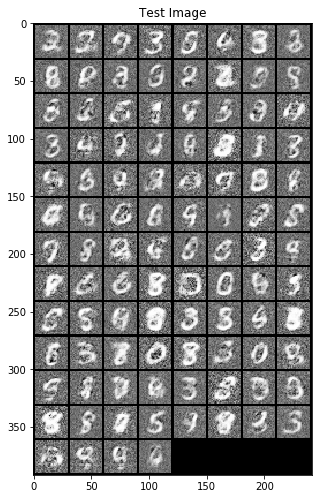

In [28]:
G.eval()

z = torch.randn((batch_size, 100))
images = G(z)
imshow(torchvision.utils.make_grid(images.data.cpu(), normalize=True), "Test Image")